### Step 0: To start ...

In [2]:
# Turn on multi-threading on your computer for faster calculation
%env OMP_NUM_THREADS = 4

env: OMP_NUM_THREADS=4


# Steps 1 and 2: Install and load the necessary packages and libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.pipeline import Pipeline
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier, KerasRegressor

# Step 3: Load the data

In [4]:
df = pd.read_csv('6722-credit-card-default-data.csv', index_col='ID')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,50000.0,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [5]:
df.info() # Checking what kinds of data we have

<class 'pandas.core.frame.DataFrame'>
Index: 24000 entries, 1 to 24000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  24000 non-null  float64
 1   SEX        24000 non-null  int64  
 2   EDUCATION  24000 non-null  int64  
 3   MARRIAGE   24000 non-null  int64  
 4   AGE        24000 non-null  int64  
 5   PAY_1      24000 non-null  int64  
 6   PAY_2      24000 non-null  int64  
 7   PAY_3      24000 non-null  int64  
 8   PAY_4      24000 non-null  int64  
 9   PAY_5      24000 non-null  int64  
 10  PAY_6      24000 non-null  int64  
 11  BILL_AMT1  24000 non-null  float64
 12  BILL_AMT2  24000 non-null  float64
 13  BILL_AMT3  24000 non-null  float64
 14  BILL_AMT4  24000 non-null  float64
 15  BILL_AMT5  24000 non-null  float64
 16  BILL_AMT6  24000 non-null  float64
 17  PAY_AMT1   24000 non-null  float64
 18  PAY_AMT2   24000 non-null  float64
 19  PAY_AMT3   24000 non-null  float64
 20  PAY_AMT4   

In [6]:
#predicting dataframe
X_pred = pd.read_csv('6722-pilot-customers.csv')#, index_col='ID')

X_pred['ID'] = X_pred['ID'].apply(lambda x:x[6:])
X_pred = X_pred.set_index('ID')
X_pred.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,500000.0,1,1,2,29,0,0,0,0,0,...,445007,542653,483003,473944,55000.0,40000.0,38000.0,20239,13750.0,13770
2,210000.0,1,1,2,29,-2,-2,-2,-2,-2,...,0,0,0,0,0.0,0.0,0.0,0,0.0,0
3,150000.0,1,1,2,27,0,0,0,0,0,...,89006,89775,87725,40788,4031.0,10006.0,3266.0,4040,1698.0,800
4,20000.0,1,2,1,38,0,0,0,0,0,...,19559,18240,17928,150,1699.0,1460.0,626.0,1750,150.0,0
5,400000.0,1,2,1,34,-1,-1,-1,-1,-1,...,11867,7839,14837,7959,9677.0,11867.0,7839.0,14837,7959.0,5712


In [7]:
#checking for min and max ages for both the df & X_pred dataframes so i can create labels accordingly
print(df['AGE'].min())
print(df['AGE'].max())

print(X_pred['AGE'].min())
print(X_pred['AGE'].max())

21
79
21
75


In [8]:
#Group ages
bins = [20, 30, 40, 50, 60, 76]
labels = ['21-30', '31-40', '41-50', '51-60', '61-76']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=True)

#create same for X_pred dataframe
X_pred['AGE_GROUP'] = pd.cut(X_pred['AGE'], bins=bins, labels=labels, right=True)

In [9]:
# Count of Delays: Features that count the number of times a client has been delayed in payments
# over the past six months. This could help capture the consistency of delays.

df['DELAY_COUNT'] = (df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] > 0).sum(axis=1)

#create same for X_pred dataframe
X_pred['DELAY_COUNT'] = (X_pred[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] > 0).sum(axis=1)

In [10]:
# Credit Utilization: Ratio of bill amount to credit limit can indicate financial stress or reliance on credit,
# which is a strong predictor of default risk.

for i in range(1, 7):
    df[f'UTILIZATION_{i}'] = df[f'BILL_AMT{i}'] / df['LIMIT_BAL']

#create same for X_pred dataframe
for i in range(1, 7):
    X_pred[f'UTILIZATION_{i}'] = X_pred[f'BILL_AMT{i}'] / X_pred['LIMIT_BAL']

In [11]:
# Month-to-Month Bill Amount Change: Indicates spending behavior and potential financial
# distress if bill amounts are increasing rapidly.

for i in range(1, 6):
    df[f'BILL_AMT_CHANGE_{i}'] = df[f'BILL_AMT{i}'] - df[f'BILL_AMT{i+1}']

#create same for X_pred dataframe
    X_pred[f'BILL_AMT_CHANGE_{i}'] = X_pred[f'BILL_AMT{i}'] - X_pred[f'BILL_AMT{i+1}']

In [12]:
# Month-to-Month Payment Changes: Reflects changes in the amount paid month over month.

for i in range(1, 6):
    df[f'PAY_AMT_CHANGE_{i}'] = df[f'PAY_AMT{i}'] - df[f'PAY_AMT{i+1}']

#create same for X_pred dataframe
    X_pred[f'PAY_AMT_CHANGE_{i}'] = X_pred[f'PAY_AMT{i}'] - X_pred[f'PAY_AMT{i+1}']

In [13]:
# Volatility of Bill and Payment Amounts: Measures the stability or variability in bill amounts and payments which might
# indicate financial management skills or stress.

df['BILL_AMT_STD'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].std(axis=1)
df['PAY_AMT_STD'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].std(axis=1)

#create same for X_pred dataframe
X_pred['BILL_AMT_STD'] = X_pred[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].std(axis=1)
X_pred['PAY_AMT_STD'] = X_pred[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].std(axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24000 entries, 1 to 24000
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   LIMIT_BAL          24000 non-null  float64 
 1   SEX                24000 non-null  int64   
 2   EDUCATION          24000 non-null  int64   
 3   MARRIAGE           24000 non-null  int64   
 4   AGE                24000 non-null  int64   
 5   PAY_1              24000 non-null  int64   
 6   PAY_2              24000 non-null  int64   
 7   PAY_3              24000 non-null  int64   
 8   PAY_4              24000 non-null  int64   
 9   PAY_5              24000 non-null  int64   
 10  PAY_6              24000 non-null  int64   
 11  BILL_AMT1          24000 non-null  float64 
 12  BILL_AMT2          24000 non-null  float64 
 13  BILL_AMT3          24000 non-null  float64 
 14  BILL_AMT4          24000 non-null  float64 
 15  BILL_AMT5          24000 non-null  float64 
 16  BILL_AMT6

In [15]:
# "Cleaning" the data -- part 1: converting data types that should be categorican into "category"

df['SEX'] = df['SEX'].astype('category')
df['EDUCATION'] = df['EDUCATION'].astype('category')
df['MARRIAGE'] = df['MARRIAGE'].astype('category')
df['PAY_1'] = df['PAY_1'].astype('category')
df['PAY_2'] = df['PAY_2'].astype('category')
df['PAY_3'] = df['PAY_3'].astype('category')
df['PAY_4'] = df['PAY_4'].astype('category')
df['PAY_5'] = df['PAY_5'].astype('category')
df['PAY_6'] = df['PAY_6'].astype('category')
df['AGE_GROUP'] = df['AGE_GROUP'].astype('category')

df.info() # let check the result



<class 'pandas.core.frame.DataFrame'>
Index: 24000 entries, 1 to 24000
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   LIMIT_BAL          24000 non-null  float64 
 1   SEX                24000 non-null  category
 2   EDUCATION          24000 non-null  category
 3   MARRIAGE           24000 non-null  category
 4   AGE                24000 non-null  int64   
 5   PAY_1              24000 non-null  category
 6   PAY_2              24000 non-null  category
 7   PAY_3              24000 non-null  category
 8   PAY_4              24000 non-null  category
 9   PAY_5              24000 non-null  category
 10  PAY_6              24000 non-null  category
 11  BILL_AMT1          24000 non-null  float64 
 12  BILL_AMT2          24000 non-null  float64 
 13  BILL_AMT3          24000 non-null  float64 
 14  BILL_AMT4          24000 non-null  float64 
 15  BILL_AMT5          24000 non-null  float64 
 16  BILL_AMT6

In [16]:
#create a temp dataframe to help with converstion of X_pred datatypes
df1 = df.drop(columns = 'DEFAULT')

In [17]:
# prompt: convert all the datatypes in X_pred to the datatypes in df1

for column in df1:
  X_pred[column] = X_pred[column].astype(df1[column].dtype)
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   LIMIT_BAL          1000 non-null   float64 
 1   SEX                1000 non-null   category
 2   EDUCATION          1000 non-null   category
 3   MARRIAGE           1000 non-null   category
 4   AGE                1000 non-null   int64   
 5   PAY_1              1000 non-null   category
 6   PAY_2              1000 non-null   category
 7   PAY_3              1000 non-null   category
 8   PAY_4              1000 non-null   category
 9   PAY_5              1000 non-null   category
 10  PAY_6              1000 non-null   category
 11  BILL_AMT1          1000 non-null   float64 
 12  BILL_AMT2          1000 non-null   float64 
 13  BILL_AMT3          1000 non-null   float64 
 14  BILL_AMT4          1000 non-null   float64 
 15  BILL_AMT5          1000 non-null   float64 
 16  BILL_AMT6  

In [18]:
#encode columns into dummies and convert the dtypes of the dummies to uint8
en_cols = ['SEX', 'MARRIAGE', 'EDUCATION','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','AGE_GROUP']

df = pd.get_dummies(df, columns=en_cols)
for column in df.columns:
    if column.startswith(tuple(en_cols)):  # Checking if the column is one of the dummies
        df[column] = df[column].astype('uint8')



In [19]:
X_pred = pd.get_dummies(X_pred, columns=en_cols)
for column in X_pred.columns:
    if column.startswith(tuple(en_cols)):  # Checking if the column is one of the dummies
        X_pred[column] = X_pred[column].astype('uint8')

In [20]:
pd.set_option('display.max_rows', None)
df.dtypes

LIMIT_BAL            float64
AGE                    int64
BILL_AMT1            float64
BILL_AMT2            float64
BILL_AMT3            float64
BILL_AMT4            float64
BILL_AMT5            float64
BILL_AMT6            float64
PAY_AMT1             float64
PAY_AMT2             float64
PAY_AMT3             float64
PAY_AMT4             float64
PAY_AMT5             float64
PAY_AMT6             float64
DEFAULT                int64
DELAY_COUNT            int64
UTILIZATION_1        float64
UTILIZATION_2        float64
UTILIZATION_3        float64
UTILIZATION_4        float64
UTILIZATION_5        float64
UTILIZATION_6        float64
BILL_AMT_CHANGE_1    float64
BILL_AMT_CHANGE_2    float64
BILL_AMT_CHANGE_3    float64
BILL_AMT_CHANGE_4    float64
BILL_AMT_CHANGE_5    float64
PAY_AMT_CHANGE_1     float64
PAY_AMT_CHANGE_2     float64
PAY_AMT_CHANGE_3     float64
PAY_AMT_CHANGE_4     float64
PAY_AMT_CHANGE_5     float64
BILL_AMT_STD         float64
PAY_AMT_STD          float64
SEX_1         

In [21]:
X_pred.dtypes

LIMIT_BAL            float64
AGE                    int64
BILL_AMT1            float64
BILL_AMT2            float64
BILL_AMT3            float64
BILL_AMT4            float64
BILL_AMT5            float64
BILL_AMT6            float64
PAY_AMT1             float64
PAY_AMT2             float64
PAY_AMT3             float64
PAY_AMT4             float64
PAY_AMT5             float64
PAY_AMT6             float64
DELAY_COUNT            int64
UTILIZATION_1        float64
UTILIZATION_2        float64
UTILIZATION_3        float64
UTILIZATION_4        float64
UTILIZATION_5        float64
UTILIZATION_6        float64
BILL_AMT_CHANGE_1    float64
BILL_AMT_CHANGE_2    float64
BILL_AMT_CHANGE_3    float64
BILL_AMT_CHANGE_4    float64
BILL_AMT_CHANGE_5    float64
PAY_AMT_CHANGE_1     float64
PAY_AMT_CHANGE_2     float64
PAY_AMT_CHANGE_3     float64
PAY_AMT_CHANGE_4     float64
PAY_AMT_CHANGE_5     float64
BILL_AMT_STD         float64
PAY_AMT_STD          float64
SEX_1                  uint8
SEX_2         

# Step 5:  Defining the vector of target (y) and matrix of features (X)

In [22]:
y = df['DEFAULT']
X = df.drop(columns = 'DEFAULT')

# Step 6:  Splitting X and y into training and testing

In [23]:
# For "apples-to-apples" comparisons, set a starting value ("seed") for the random number generator
np.random.seed(30000)

# split the data randomly into 80% train and 20% test samples
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, stratify=y)
# IMPORTANT: these samples are stratified, i.e., the proportion of retained and not-retained customers is the same in both

# Lets check the results
print("Training feature set shape, X_train:", X_train.shape)
print("Test feature set shape, X_test:", X_test.shape)
print("Training label set shape, y_train:", y_train.shape)
print("Test label set shape, y_test:", y_test.shape)

Training feature set shape, X_train: (19200, 115)
Test feature set shape, X_test: (4800, 115)
Training label set shape, y_train: (19200,)
Test label set shape, y_test: (4800,)


# Steps 7, 8, 9: Train a model on the training data, Use it to predict the values in the testing data, Compute the metrics of the model and compare models

In [24]:
# First we define a set of functions to compute the metrics of the model

# ROC curve
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Confusion Matrix returns in the format: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp

# Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

# Model №1: Logistic regression

In [72]:
# define the model and call it classifier_LR
classifier_LR = LogisticRegression(solver='liblinear')

# train classifier_LR on the training data
classifier_LR.fit(X_train, y_train)

# This is a regression, so it has coefficients -- lets see them
# Note, there is no easy way to show significance, etc. with sklearn
print('Intercept: ' + str(classifier_LR.intercept_))
print('Coefficients (10 largest and 10 smallest) [recall, there are 116 of them, in total: ')
summary = pd.DataFrame([X_test.columns,classifier_LR.coef_[0]]).transpose().sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']

top10positive = summary.head(10) # 10 largest (by value)
print(top10positive)

top10negative = summary.tail(10) # 10 smallest (by value)
print(top10negative)



Intercept: [-0.01887752]
Coefficients (10 largest and 10 smallest) [recall, there are 116 of them, in total: 
            Variable Coefficient
14       DELAY_COUNT    0.228083
50           PAY_1_2    0.052631
61           PAY_2_2    0.040893
72           PAY_3_2    0.030781
83           PAY_4_2    0.026305
93           PAY_5_2    0.022924
103          PAY_6_2    0.020822
36        MARRIAGE_1    0.014843
112  AGE_GROUP_41-50    0.012017
49           PAY_1_1    0.007131
            Variable Coefficient
1                AGE    -0.02037
34             SEX_2   -0.023205
110  AGE_GROUP_21-30   -0.033335
37        MARRIAGE_2   -0.033914
102          PAY_6_0   -0.039157
92           PAY_5_0   -0.039698
81           PAY_4_0   -0.040731
70           PAY_3_0   -0.042888
59           PAY_2_0   -0.056138
48           PAY_1_0   -0.076701


In [73]:
average_of_ones = df['DEFAULT'].mean()

print("Avg of 1s in the column OR Avg of non-defaulters:", average_of_ones)

Avg of 1s in the column OR Avg of non-defaulters: 0.22108333333333333


In [74]:
# Use the trained model to predict testing data

y_pred_prob = classifier_LR.predict_proba(X_test)[:,1] # probabilities

# Select the threshold value 
class_threshold = average_of_ones

y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # applying the threshold rule to classify

print(y_pred_prob[0:5]) # first 5 probabilities
print(y_pred[0:5]) # resultant predicted classification
print(y_test[0:5]) # actual outcomes

# oops ... for the first 5 customers our model made two mistakes: on 1st customer ("false positive") and on 3rd customer ("false negative")


[0.46750155 0.16555398 0.63291635 0.67240422 0.0256013 ]
[1 0 1 1 0]
ID
9824     1
5092     0
14624    0
15255    1
15128    0
Name: DEFAULT, dtype: int64


Metrics of the logistic regression model: 

Confusion matrix: 
[[2389  301]
 [1350  760]]
                                   Accuracy: 0.6560416666666666
                   SENSITIVITY (aka RECALL): 0.7163053722902922
                 SPECIFICITY (aka FALL-OUT): 0.6389408932869751
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.36018957345971564
                 NEGATIVE PREDICTIVE VALUE): 0.8881040892193308


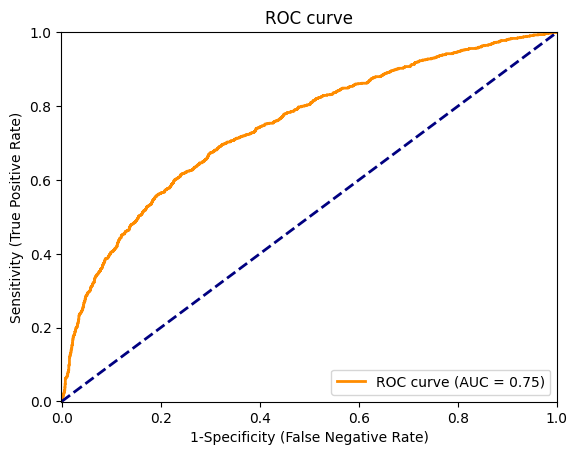

 AUC: 0.7452768145025597


In [75]:
# Lets look at the model metrics
print('Metrics of the logistic regression model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))

print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


In [86]:
# Apply variable selection with Stepwise Recursive Feature Selection

from sklearn.feature_selection import RFE

rfe = RFE(estimator=classifier_LR, n_features_to_select=30, step=1) # in this example we will select 25 variables; this number "20" is a hyperparameter to tune
rfe.fit(X_train, y_train)
ranking = rfe.ranking_.reshape(len(X_train.columns))

# which 20 variables are in the model?
pd.DataFrame([X_test.columns,ranking]).transpose().sort_values(1).head(30)


,0,1
57,PAY_2_-2,1
35,MARRIAGE_0,1
36,MARRIAGE_1,1
37,MARRIAGE_2,1
43,EDUCATION_4,1
44,EDUCATION_5,1
46,PAY_1_-2,1
47,PAY_1_-1,1
48,PAY_1_0,1
49,PAY_1_1,1


Metrics of the logistic regression model after variable selection: 

Confusion matrix: 
[[3129  475]
 [ 610  586]]
                                   Accuracy: 0.7739583333333333
                   SENSITIVITY (aka RECALL): 0.5523091423185674
                 SPECIFICITY (aka FALL-OUT): 0.8368547740037443
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.4899665551839465
                 NEGATIVE PREDICTIVE VALUE): 0.8682019977802442


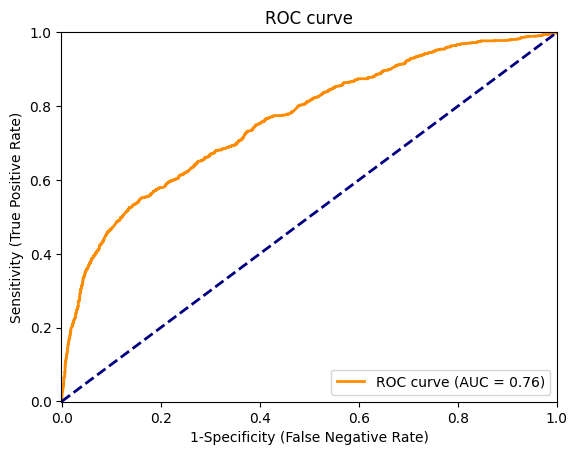

 AUC: 0.7610536619008595


In [87]:
# Train the model and call it classifier_LR_RFE
classifier_LR_RFE = rfe.fit(X_train, y_train)

# Use the trained model to predict testing data
y_pred_prob = classifier_LR_RFE.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification


# Lets look at the model metrics after variable selection
print('Metrics of the logistic regression model after variable selection: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


## Summary for Logistic Regression:

- We first trained the model with the entire set of 116 variables
- When applied to testing data, AUC=75%
- Through variable selection (30) AUC increased to 76%

# Method №2: Classification and Regression Tree, CART (aka "decision tree")


In [30]:
# Define a CART model and call it classifier_DT
classifier_DT = DecisionTreeClassifier(max_leaf_nodes = 5, random_state=3000) # random_state -- is same as random seed, neede to get the same result every time we rerun

# Train the model classifier_DT on the training data
classifier_DT.fit(X_train, y_train)

#  Use the trained model to predict testing data
y_pred_prob = classifier_DT.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

print(y_pred_prob[0:10]) # first 5 probabilities
print(y_pred[0:10]) # resultant predicted classification
print(y_test[0:10]) # actual outcomes

# WOW -- the CART model made no mistakes on the first 5 customers!


[0.43600683 0.11867776 0.72413793 0.72413793 0.11867776 0.11867776
 0.11867776 0.11867776 0.11867776 0.72413793]
[1 0 1 1 0 0 0 0 0 1]
ID
9824     1
5092     0
14624    0
15255    1
15128    0
10086    1
2572     0
16473    0
705      0
5903     1
Name: DEFAULT, dtype: int64


CART tree with 5 leafs


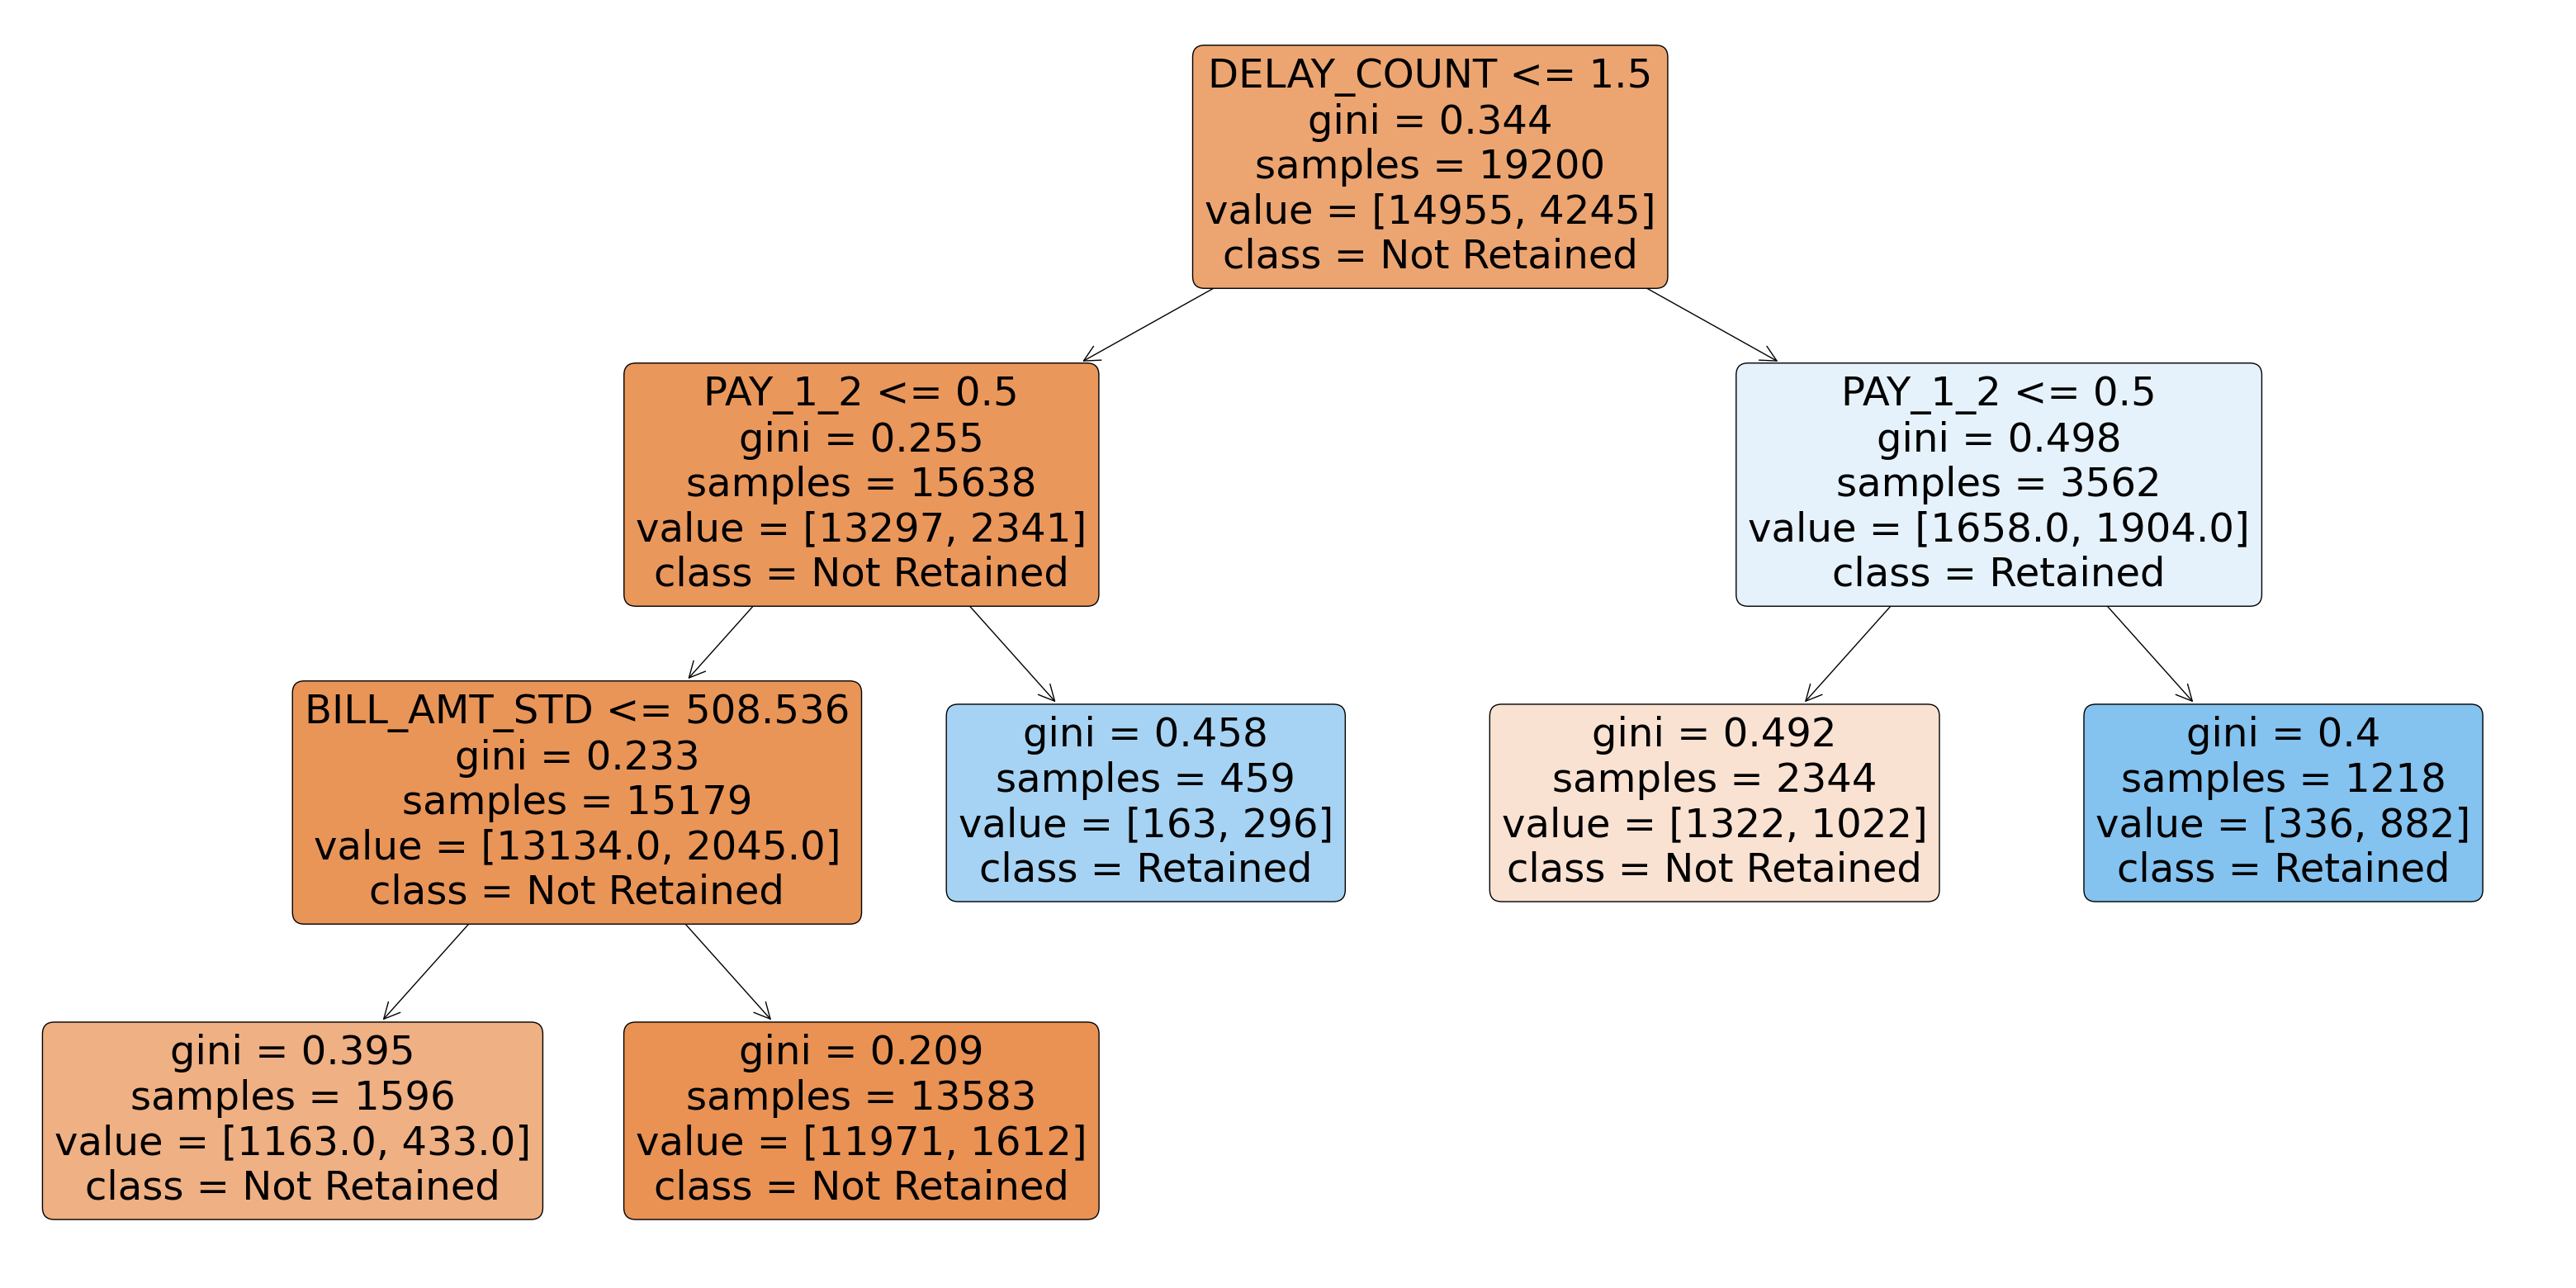

In [31]:
# Visualizing the resultant tree

from sklearn import tree

plt.figure(figsize=(40,20))
tree.plot_tree(classifier_DT.fit(X_train, y_train), feature_names = X_train.columns, filled = True,
               class_names = ['Not Retained', 'Retained'], rounded = True)
print('CART tree with 5 leafs')


Metrics of the CART model: 

Confusion matrix: 
[[2965  418]
 [ 774  643]]
                                   Accuracy: 0.7516666666666667
                   SENSITIVITY (aka RECALL): 0.6060320452403393
                 SPECIFICITY (aka FALL-OUT): 0.7929927788178658
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.4537755822159492
                 NEGATIVE PREDICTIVE VALUE): 0.8764410286727756


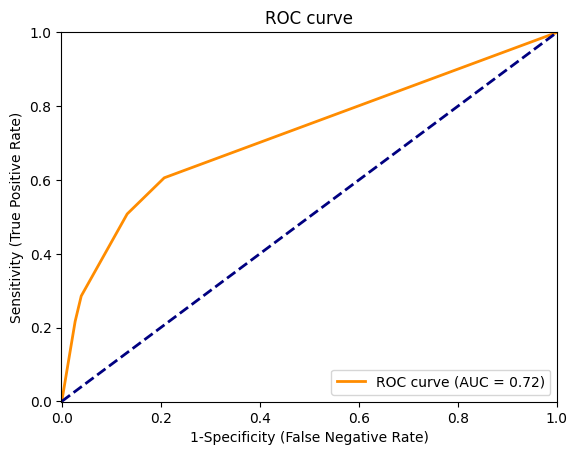

 AUC: 0.7213420756178539


In [32]:
# Lets look at the model metrics

print('Metrics of the CART model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

In [33]:
# Hyper-parameter tuning. A CART model has multiple hyper-parameters, for instance:
# -- max number of leaves on a tree,
# -- min number of datapoints at a leaf
# -- min number of datapoints to create a split
# and so on

DecisionTreeClassifier() # display what those hyper-parameters are and their default values

DecisionTreeClassifier()

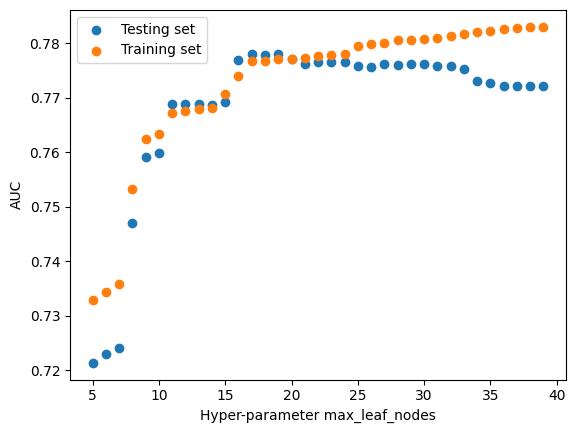

In [34]:
# Tuning hyper-parameter max_leaf_nodes

n_max_leaf_nodes = range(5,40) # Lets train the models with 5, 6, 7, ... 40 leafs

# for each model calculate AUC for testing
array = []
for n in n_max_leaf_nodes:

    classifier_DT = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
    classifier_DT = classifier_DT.fit(X_train, y_train)

    y_pred_prob = classifier_DT.predict_proba(X_test)[:,1]
    y_pred = np.where(y_pred_prob > class_threshold, 1, 0)

    array.append([n,roc_auc_score(y_test, y_pred_prob)])

# plot the testing set AUCs
array = pd.DataFrame(array)
plt.scatter(array[0],array[1])

# now for each model calculate AUC on training
array = []
for n in n_max_leaf_nodes:

    classifier_DT = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
    classifier_DT = classifier_DT.fit(X_train, y_train)

    y_pred_prob = classifier_DT.predict_proba(X_train)[:,1]
    y_pred = np.where(y_pred_prob > class_threshold, 1, 0)

    array.append([n,roc_auc_score(y_train, y_pred_prob)])

# plot the training set AUCs
array = pd.DataFrame(array)
plt.scatter(array[0],array[1])

# label the axes on the plot
plt.xlabel('Hyper-parameter max_leaf_nodes')
plt.ylabel('AUC')

# add the legend
plt.legend(['Testing set','Training set'])


## This plot illustrates the concept of "overfitting":  

- the more leafs the tree has, the higher is the AUC on the training data

- from the plot, the ideal number of leaves for high AUC is 18-20, I settled on 19

In [35]:
# lets train the model with 21 leafs
classifier_DT = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 19)
classifier_DT = classifier_DT.fit(X_train, y_train)

# obtain its predictions
y_pred_prob = classifier_DT.predict_proba(X_test)[:,1]
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)

# calclate and print the AUC
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

 AUC: 0.7781141993895258


## Summary for CART:
- we then tuned the hyper-paramter max_leaf_nodes (18), we increased AUC from 72.1% to 77.8%

# Method №3: Random Forest

In [36]:
# Define a random forest model and call it classifier_RF
classifier_RF = RandomForestClassifier(random_state=30000)

# Train the model classifier_RF on the training data
classifier_RF.fit(X_train, y_train)


RandomForestClassifier(random_state=30000)

Metrics of the Random Forest model: 

Confusion matrix: 
[[2720  339]
 [1019  722]]
                                   Accuracy: 0.7170833333333333
                   SENSITIVITY (aka RECALL): 0.6804901036757776
                 SPECIFICITY (aka FALL-OUT): 0.7274672372292057
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.414704192992533
                 NEGATIVE PREDICTIVE VALUE): 0.8891794704151683


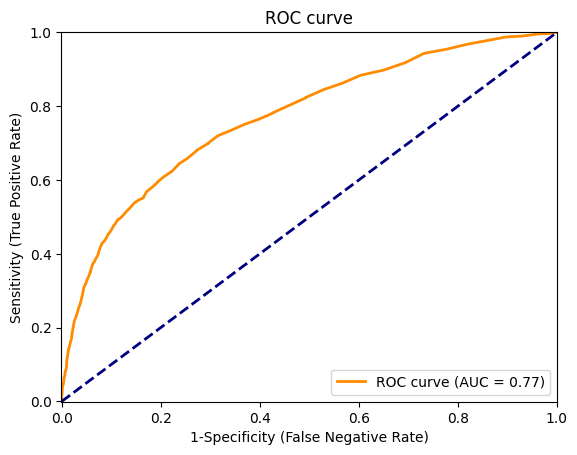

 AUC: 0.7698311528457084


In [37]:
# Use the trained model to predict testing data
y_pred_prob = classifier_RF.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Random Forest model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


Optimized hyper-parameters:{'n_estimators': 300}
Metrics of the Random Forest model with the optimized hyper-parameter for the "number of trees": 

Confusion matrix: 
[[2720  339]
 [1019  722]]
                                   Accuracy: 0.7170833333333333
                   SENSITIVITY (aka RECALL): 0.6804901036757776
                 SPECIFICITY (aka FALL-OUT): 0.7274672372292057
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.414704192992533
                 NEGATIVE PREDICTIVE VALUE): 0.8891794704151683


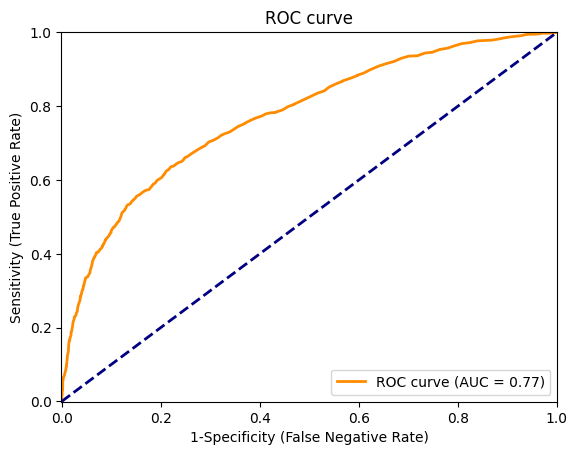

 AUC: 0.7732582335768963


In [39]:
# Hyper-parameter tuning ("optimization") using the function GridSearchCV for maximizing AUC
score_func = make_scorer(roc_auc_score, greater_is_better=True)

n_trees = [100, 200, 300, 400, 500, 600] # as an example, we will tune the "numeber of trees" hyper-parameter (n_trees) and we will consider values of 100, 200, ... 600 trees in the forest
Grid_srch_parameters_list = [ [{'n_estimators':n_trees}] ]

# we will apply a 5-fold cross-validation and call the resultant function "grid_search"
grid_search = GridSearchCV(estimator = classifier_RF,
                           cv = 5,
                           param_grid = Grid_srch_parameters_list[0],
                           scoring = score_func,
                           return_train_score = True)

# apply function grid_search to the training data, call the resultand best model grid_search_RF
grid_search_RF = grid_search.fit(X_train, y_train)

# use the best model to predict the testing data
y_pred_prob = grid_search_RF.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

print('Optimized hyper-parameters:' + str(grid_search.best_params_))

# Lets look at the model metrics

print('Metrics of the Random Forest model with the optimized hyper-parameter for the "number of trees": \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


<Axes: title={'center': 'Feature Importance'}>

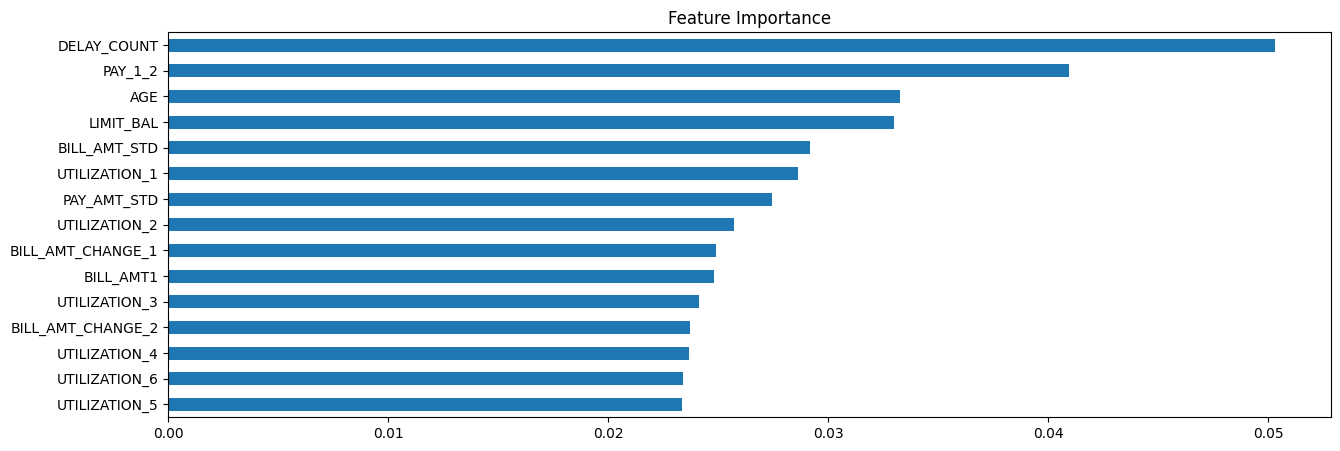

In [40]:
# calculate feature importances
importances = grid_search_RF.best_estimator_.feature_importances_

# plot them
plt.figure(figsize=(15,5))
plt.title('Feature Importance')
plt.xlabel('Decrease in Gini (recal, Gini = 2*AUC-1)')
feature_importances = pd.Series(classifier_RF.feature_importances_, index=X_train.columns)
feature_importances.nlargest(15).sort_values().plot(kind='barh', align='center')

## Summary for Random Forest:

- we first trained the model with default hyper-parameters
- applying it to testing set we got AUC=77%
- we then tuned the hyper-paramter "number of trees" and increased AUC to 77%

# Method №4: Gradient Boosting Machine

In [65]:
# Define the gradient boosting machine model and call it classifier_GBM
classifier_GBM = GradientBoostingClassifier(random_state=30000)

# Train the model classifier_GBM on the training data
classifier_GBM.fit(X_train, y_train)

# A gradient boosting model has many hyper-parameters, for example::
# -- the number of trees in the forest ensemble,
# -- speed of boosting ("learning rate", "decay rate"),
# -- max number of leafs on each tree,
# -- min number of datapoints at a leaf
# and so on


GradientBoostingClassifier(random_state=30000)

Metrics of the Gradient Boosting Machine model: 

Confusion matrix: 
[[2915  380]
 [ 824  681]]
                                   Accuracy: 0.7491666666666666
                   SENSITIVITY (aka RECALL): 0.6418473138548539
                 SPECIFICITY (aka FALL-OUT): 0.7796202193099759
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.45249169435215947
                 NEGATIVE PREDICTIVE VALUE): 0.8846737481031867


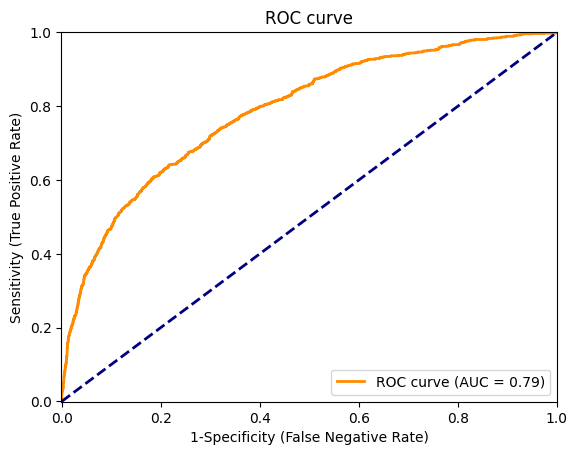

 AUC: 0.7877019842559223


In [66]:
# Use the trained model to predict testing data
y_pred_prob = classifier_GBM.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Gradient Boosting Machine model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

Optimized hyper-parameters:{'learning_rate': 0.1, 'n_estimators': 300}
Metrics of the Gradient Boosting Machine model with the optimized hyper-parameters": 

Confusion matrix: 
[[2888  382]
 [ 851  679]]
                                   Accuracy: 0.743125
                   SENSITIVITY (aka RECALL): 0.6399622997172478
                 SPECIFICITY (aka FALL-OUT): 0.7723990371757155
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.4437908496732026
                 NEGATIVE PREDICTIVE VALUE): 0.8831804281345565


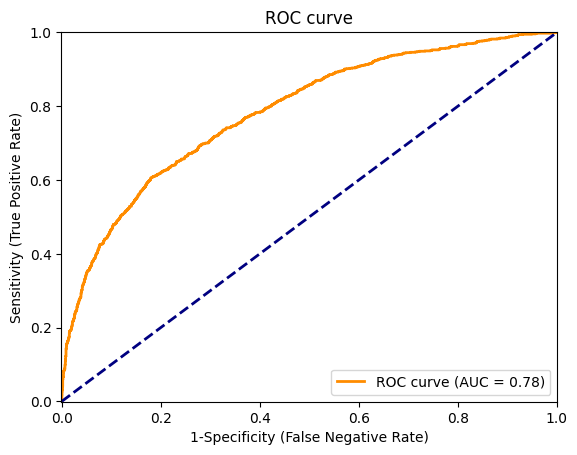

 AUC: 0.7837347075770359


In [69]:
# Hyper-parameter tuning ("optimization") using the function GridSearchCV for maximizing AUC
score_func = make_scorer(roc_auc_score, greater_is_better=True)

# as an example, we will tune two parameters
n_trees = [100, 200, 300, 400, 500, 600] # first, the "numeber of trees" hyper-parameter (n_trees) and we will consider values of 100, 200, ... 600 trees in the forest
learning_rates = [0.01, 0.1] # second, speed of boosting ("learning rate") and we will consider two values 0.01 и 0.1

Grid_srch_parameters_list = [ [{'n_estimators':n_trees, 'learning_rate': learning_rates}] ]

# we will apply a 5-fold cross-validation and call the resultant function "grid_search"
grid_search = GridSearchCV(estimator = classifier_GBM, cv = 5, param_grid = Grid_srch_parameters_list[0], scoring = score_func,
                              return_train_score = True)

# # apply function grid_search to the training data, call the resultant best model grid_search_GBM
grid_search_GBM = grid_search.fit(X_train, y_train)

# use the best model to predict the testing data
y_pred_prob = grid_search_GBM.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

print('Optimized hyper-parameters:' + str(grid_search.best_params_))

# Lets look at the model metrics

print('Metrics of the Gradient Boosting Machine model with the optimized hyper-parameters": \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


## Summary for Gradient Boosting:

- we first trained the model with default hyper-parameters we got AUC=79%
- we then tuned two hyper-paramters "number of trees" and "learning rate" and increased AUC to 78%

# Method №5: Support Vector Machines

In [90]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svm_estimators = []
svm_estimators.append(('standardize', StandardScaler())) # scale the data
svm_estimators.append(('svm', svm.SVC(probability=True))) # define SVM with probabilities (recall, SVM be default does not predict probabilities)

# Define the support vectors machine model and call it classifier_SVM
Classifier_SVM = Pipeline(svm_estimators, verbose=False)

# Train the model classifier_SVM on the training data
Classifier_SVM.fit(X_train, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('svm', SVC(probability=True))])

Metrics of the Support Vector Machines model: 

Confusion matrix: 
[[3449  645]
 [ 290  416]]
                                   Accuracy: 0.8052083333333333
                   SENSITIVITY (aka RECALL): 0.3920829406220547
                 SPECIFICITY (aka FALL-OUT): 0.9224391548542391
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.5892351274787535
                 NEGATIVE PREDICTIVE VALUE): 0.8424523693209575


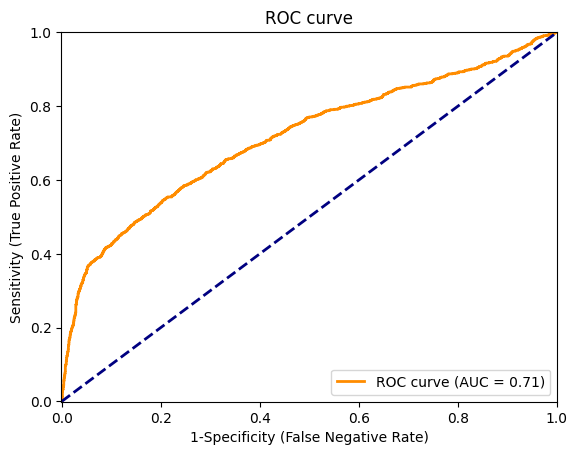

 AUC: 0.7142566356757705


In [45]:
# use the fitted model to predict the testing data
y_pred_prob = Classifier_SVM.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Support Vector Machines model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

## Summary for SVM:

- we trained the model with default hyper-parameters
- applying it to testing set we got AUC=71%


# Method №6: Artificial Neural Networks ("Deep Learning") with Tensor Flow

In [61]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.callbacks import EarlyStopping

# Optimizer
optimizer = optimizers.Adam(learning_rate=0.01)

# Define the model creation function
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=115, activation='relu'))
    model.add(Dropout(0.5))  # Dropout 50% of the nodes
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.5))  # Again, dropout 50% of the nodes
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Early stopping callback
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=5,
    verbose=1,
    restore_best_weights=True
)

# Create the KerasClassifier, including the EarlyStopping callback
nn_estimators = [
    ('standardize', StandardScaler()),  # scale the data
    ('mlp', KerasClassifier(
        model=create_model, 
        epochs=30, 
        batch_size=128, 
        validation_split=0.2, 
        callbacks=[early_stopping_monitor]  # Integrate the callback here
    ))
]

# Define the TensorFlow Neural Network model and call it classifier_TF_NN
Classifier_TF_NN = Pipeline(nn_estimators, verbose=False)

# Train the model on the training data
Classifier_TF_NN.fit(X_train, y_train)

Epoch 1/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.7349 - loss: 0.6088 - val_accuracy: 0.7773 - val_loss: 0.4694
Epoch 2/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.7928 - loss: 0.4848 - val_accuracy: 0.7734 - val_loss: 0.4672
Epoch 3/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.7987 - loss: 0.4742 - val_accuracy: 0.7763 - val_loss: 0.4557
Epoch 4/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.8010 - loss: 0.4686 - val_accuracy: 0.7901 - val_loss: 0.4559
Epoch 5/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.7987 - loss: 0.4734 - val_accuracy: 0.7768 - val_loss: 0.4630
Epoch 6/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.8020 - loss: 0.4640 - val_accuracy: 0.7706 - val_loss: 0.4614
Epoch 7/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.7919 - loss: 0.4722 - val_accuracy: 0.7951 - val_loss: 0.4500
Epoch 8/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.8016 - loss: 0.4658 - 

Pipeline(steps=[('standardize', StandardScaler()),
                ('mlp',
                 KerasClassifier(batch_size=128, callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x2c6a79d20>], epochs=30, model=<function create_model at 0x2c6c8e7a0>, validation_split=0.2))])

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step
Metrics of the Tensor Flow Neural Network model: 

Confusion matrix: 
[[3032  442]
 [ 707  619]]
                                   Accuracy: 0.760625
                   SENSITIVITY (aka RECALL): 0.5834118755890669
                 SPECIFICITY (aka FALL-OUT): 0.810912008558438
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.46681749622926094
                 NEGATIVE PREDICTIVE VALUE): 0.872769142199194


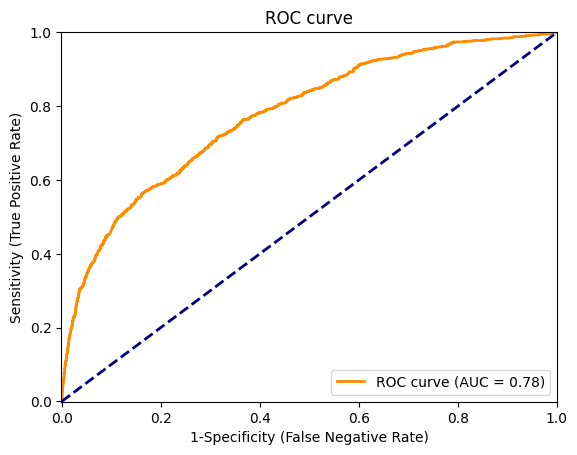

 AUC: 0.7774571668474461


In [62]:
# use the fitted model to predict the testing data
y_pred_prob = Classifier_TF_NN.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Tensor Flow Neural Network model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

## Summary for Tensor Flow NN:

- we trained the model, adjusting hyper-parameters for optimization. AUC = 78%


# Step 10: Finishing the anlayses -- export the model predictions for subsequent use

In [68]:
y_pred_prob = classifier_GBM.predict_proba(X_pred)[:,1]
y_pred_prob = np.where(y_pred_prob > class_threshold, 1, 0)

# Lets add the ID column to know "who is who"
#
ids = range(1, len(y_pred_prob)+1)
Prediction = pd.DataFrame({"ID":ids,"Predicted Default":y_pred_prob})

# Export the predictions into a CSV file
Prediction.to_csv("Predicted Default Probability_testing_FE.csv",sep = ',')